In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import split_folders

In [2]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.2))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))
classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)  

In [3]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
filepath = 'weights_adam1.hdf5'
# acc_check = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
# stop_check = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='max')
# callbacks_list = [acc_check,stop_check]

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)


training_set = train_datagen.flow_from_directory('dataset',
target_size = (64, 64),
batch_size = 1,
color_mode = 'rgb',                                                 
class_mode = 'categorical')


Found 354 images belonging to 3 classes.


In [7]:
split_folders.ratio('dataset', output="splited_data", seed=1337, ratio=(.8, .1, .1))

In [8]:
img_rows , img_cols = 64,64
classes = 3
batch_size = 1

In [9]:
training_set = train_datagen.flow_from_directory(
            'splited_data/train', 
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode='categorical')

Found 282 images belonging to 3 classes.


In [10]:
validation_set = train_datagen.flow_from_directory(
            'splited_data/val',
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode='categorical')

Found 33 images belonging to 3 classes.


In [68]:
 history_adam = classifier.fit_generator( training_set,
                    steps_per_epoch=354,
                    epochs=50,
                    validation_data=validation_set,
                    validation_steps=150)

Epoch 1/50
282/282 [==============================] - 11s 41ms/step - loss: 0.4497 - acc: 0.8156 - val_loss: 0.3678 - val_acc: 0.8788
Epoch 2/50
282/282 [==============================] - 11s 39ms/step - loss: 0.4743 - acc: 0.8191 - val_loss: 0.3756 - val_acc: 0.8485
Epoch 3/50
282/282 [==============================] - 11s 39ms/step - loss: 0.3899 - acc: 0.8191 - val_loss: 0.5126 - val_acc: 0.7879
Epoch 4/50
282/282 [==============================] - 11s 39ms/step - loss: 0.4245 - acc: 0.8404 - val_loss: 0.2380 - val_acc: 0.8788
Epoch 5/50
282/282 [==============================] - 11s 41ms/step - loss: 0.4105 - acc: 0.8262 - val_loss: 0.3500 - val_acc: 0.8788
Epoch 6/50
282/282 [==============================] - 11s 39ms/step - loss: 0.4467 - acc: 0.8191 - val_loss: 0.3542 - val_acc: 0.8182
Epoch 7/50
282/282 [==============================] - 11s 39ms/step - loss: 0.3499 - acc: 0.8369 - val_loss: 0.3642 - val_acc: 0.8485
Epoch 8/50
282/282 [==============================] - 11s 39ms

Epoch 39/50
282/282 [==============================] - 11s 39ms/step - loss: 0.2076 - acc: 0.9078 - val_loss: 0.0893 - val_acc: 0.9697
Epoch 40/50
282/282 [==============================] - 12s 41ms/step - loss: 0.1918 - acc: 0.9255 - val_loss: 0.2121 - val_acc: 0.8788
Epoch 41/50
282/282 [==============================] - 11s 40ms/step - loss: 0.3026 - acc: 0.8652 - val_loss: 0.1865 - val_acc: 0.8788
Epoch 42/50
282/282 [==============================] - 11s 39ms/step - loss: 0.2811 - acc: 0.8830 - val_loss: 0.1697 - val_acc: 0.9394
Epoch 43/50
282/282 [==============================] - 11s 39ms/step - loss: 0.2018 - acc: 0.9184 - val_loss: 0.1248 - val_acc: 0.9394
Epoch 44/50
282/282 [==============================] - 11s 39ms/step - loss: 0.1453 - acc: 0.9539 - val_loss: 0.1420 - val_acc: 0.9697
Epoch 45/50
282/282 [==============================] - 11s 39ms/step - loss: 0.1952 - acc: 0.9397 - val_loss: 0.1737 - val_acc: 0.9091
Epoch 46/50
282/282 [==============================] - 

In [69]:
classifier.save('model_adam1.h5')    

In [70]:
from tensorflow.python.keras.models import load_model
new_classifier = load_model('model_adam1.h5')

In [71]:
new_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
__________

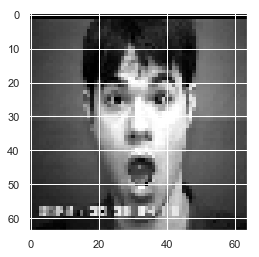

In [72]:
import numpy as np
from tensorflow.python.keras.preprocessing import image
import matplotlib.pyplot as plt

test_image = image.load_img('pred/s.png', target_size = (64, 64,1))
plt.imshow(test_image)

In [73]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(result)
result = np.round(result)
print(result)

[[0. 0. 1.]]
[[0. 0. 1.]]


In [74]:
if result[0][0] == 1:
    print('The gesture shows a disgust')
elif result[0][1] == 1:
    print('The gesture shows a happy')
else: 
    print('The gesture shows a surprise')

The gesture shows a surprise


#### CONFUSION MATRIX

In [75]:
import argparse
import imutils
from tensorflow.python.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib

In [76]:
model = load_model("model_adam1.h5")

In [77]:
def label_predict(img):
    
    test_image = image.load_img(img,target_size = (64, 64,1))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)

    result = classifier.predict(test_image)
    print(result)
    if result[0][0] == 1:
        label = "0"
    elif result[0][1] == 1:
        label = "1"
    else: 
        label = "2"
    return label

In [78]:
label_predict('pred/h.png')

[[0. 1. 0.]]


'1'

In [79]:
path="splited_data/test"
os.listdir(path)

['disgust', 'happiness', 'surprise']

In [80]:
path="splited_data/test"
labels=[]
pred_labels=[]

imagePaths = os.path.join(path,"disgust")
random.seed(42)
for imagePath in os.listdir(imagePaths):
    pred=label_predict(os.path.join(imagePaths,imagePath))
    label = 0
    labels.append(label)
    pred_labels.append(pred)
    
imagePaths = os.path.join(path,"happiness")
random.seed(42)
for imagePath in os.listdir(imagePaths):
    pred=label_predict(os.path.join(imagePaths,imagePath))
    label = 1
    labels.append(label)
    pred_labels.append(pred)
    
imagePaths = os.path.join(path,"surprise")
random.seed(42)
for imagePath in os.listdir(imagePaths):
    pred=label_predict(os.path.join(imagePaths,imagePath))
    label = 2
    labels.append(label)
    pred_labels.append(pred)

[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1.0000000e+00 1.3979747e-10 0.0000000e+00]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]


In [81]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [82]:
pred_labels

['0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2']

In [83]:
pred_label=pred_labels
predicted_label=[]

In [84]:
for i in pred_label:
    predicted_label.append(int(i))

In [85]:
import numpy as np
from pandas_ml import ConfusionMatrix


y_actu=np.array(labels)
y_pred=np.array(predicted_label)
cm = ConfusionMatrix(y_actu, y_pred)
cm
cm.print_stats()

Confusion Matrix:

Predicted   0   1   2  __all__
Actual                        
0          10   3   0       13
1           0  13   0       13
2           0   0  13       13
__all__    10  16  13       39


Overall Statistics:

Accuracy: 0.9230769230769231
95% CI: (0.7912980787735568, 0.9838466996893416)
No Information Rate: ToDo
P-Value [Acc > NIR]: 2.3311772561744865e-11
Kappa: 0.8846153846153847
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0         1         2
Population                                   39        39        39
P: Condition positive                        13        13        13
N: Condition negative                        26        26        26
Test outcome positive                        10        16        13
Test outcome negative                        29        23        26
TP: True Positive                            10        13        13
TN: True Negative                            26        23        26
FP: 

In [86]:
import pandas as pd
y_actu_pd = pd.Series(y_actu, name='Actual')
y_pred_pd = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu_pd, y_pred_pd)

In [87]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion = df_confusion.drop("All", axis=1)
df_confusion = df_confusion.drop("All", axis=0)
df_confusion

Predicted,0,1,2
Actual,,,
0,10,3,0
1,0,13,0
2,0,0,13


In [88]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted,0,1,2
Actual,,,
0,0.769231,0.230769,0.0
1,0.000000,1.000000,0.0
2,0.000000,0.000000,1.0


In [89]:
def confusion_plot(data,title):
    ax = plt.axes()
    sns.heatmap(data, annot=True,ax=ax)
    ax.set_title(title)
    file_name="norm cm 1 final.pdf"
    print(file_name)
    plt.savefig(file_name,bbox_inches='tight')
    plt.show()

norm cm 1 final.pdf


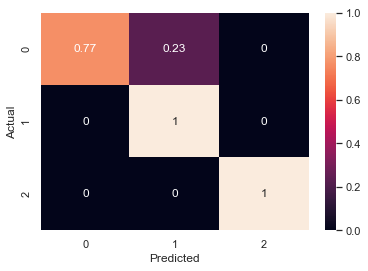

In [90]:
n2="";
confusion_plot(df_conf_norm,n2)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_actu_pd, y_pred_pd)
cm

array([[10,  3,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [92]:
def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,  classes, rotation = 45)
    plt.yticks(tick_marks,  classes)
    
    if normalize:
        cm = c.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('ncm')
    else:
        print('cm')
    
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment = "center",
        color = "white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

cm
[[10  3  0]
 [ 0 13  0]
 [ 0  0 13]]


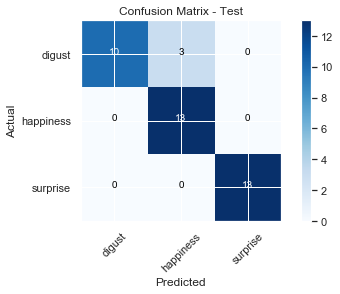

In [93]:
cm_plot_labels = ['digust', 'happiness', 'surprise']
plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix - Test')

In [105]:
import matplotlib.pyplot as plt

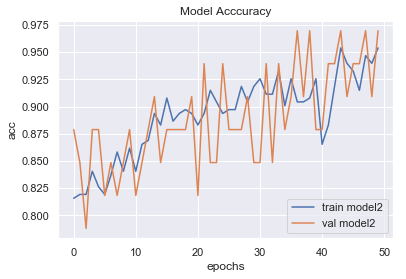

In [106]:
plt.plot(history_adam.history['acc'])
plt.plot(history_adam.history['val_acc'])
plt.title('Model Acccuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train model2', 'val model2'], loc='lower right')
plt.show()

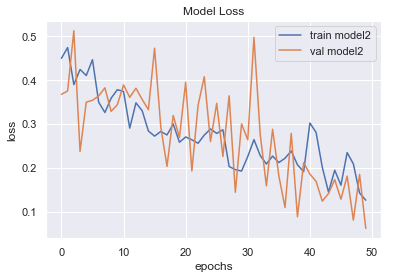

In [107]:
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train model2', 'val model2'], loc='upper right')
plt.show()